In [1]:
# import necessary module 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io
from array_response import *

In [2]:
Ns = 3 # number of streams

Nc = 6 # number of cluster
Nray = 1 # number of rays in each cluster

Nt = 64 # number of transmit antennas
Nr = 16 # number of receive antennas

angle_sigma = 10/180*np.pi # standard deviation of the angles in azimuth and elevation both of Rx and Tx

gamma = np.sqrt((Nt*Nr)/(Nc*Nray))
sigma = 1 # according to the normalization condition of H

realization = 1000 # equivalent to number of taking sample
count = 0

In [3]:
H = np.zeros((Nr,Nt,realization),dtype=complex)
At = np.zeros((Nt,Nc*Nray,realization),dtype=complex)
Ar = np.zeros((Nr,Nc*Nray,realization),dtype=complex)
alpha = np.zeros((Nc*Nray,realization),dtype=complex)
Fopt = np.zeros((Nt,Ns,realization),dtype=complex)
Wopt = np.zeros((Nr,Ns,realization),dtype=complex)

AoD = np.zeros((2,Nc*Nray),dtype=complex)
AoA = np.zeros((2,Nc*Nray),dtype=complex)

for reali in range(realization):
    for c in range(1,Nc+1):
        AoD_azi_m = np.random.uniform(0,2*np.pi,1) # Mean Angle of Departure _ azimuth
        AoD_ele_m = np.random.uniform(0,np.pi,1) # Mean Angle of Departure _ elevation
        AoA_azi_m = np.random.uniform(0,2*np.pi,1) # Mean Angle of Arrival_ azimuth
        AoA_ele_m = np.random.uniform(0,np.pi,1) # Mean Angle of Arrival_ elevation
        AoD[0,(c-1)*Nray:Nray*c] = np.random.laplace(AoD_azi_m, angle_sigma, (1,Nray))
        AoD[1,(c-1)*Nray:Nray*c] = np.random.laplace(AoD_ele_m, angle_sigma, (1,Nray))
        AoA[0,(c-1)*Nray:Nray*c] = np.random.laplace(AoA_azi_m, angle_sigma, (1,Nray))
        AoA[1,(c-1)*Nray:Nray*c] = np.random.laplace(AoA_ele_m, angle_sigma, (1,Nray))
    for j in range(Nc*Nray):
        At[:,j,reali] = array_response(AoD[0,j],AoD[1,j],Nt) # UPA array response
        Ar[:,j,reali] = array_response(AoA[0,j],AoA[1,j],Nr)
        alpha[j,reali] = np.random.normal(0, np.sqrt(sigma/2)) + 1j*np.random.normal(0, np.sqrt(sigma/2)) # related to power normalization

In [12]:
print(alpha.shape)
print(np.mean(alpha))
print(np.mean(np.abs(alpha)))
print(np.sqrt(np.pi)/2)


(6, 1000)
(0.00849639941576-0.00197495559557j)
0.893406033792
0.886226925453


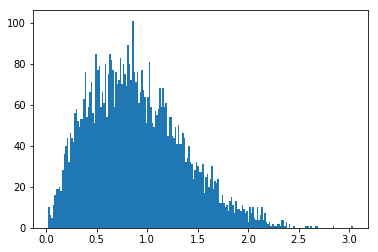

In [18]:
test = np.abs(alpha).reshape(6000,1)
n, bins, patches = plt.hist(test,bins=200)
plt.show()